In [130]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# k-means clustering

### 데이터 준비
* 테스트 데이터 생성
    * make_blobs()

In [131]:
# 3개의 군집을 가지는 테스트 데이터 생성
from sklearn.datasets import make_blobs
features, targets = make_blobs(n_samples=200, 
                    n_features=2,
                    centers=3,
                    cluster_std=0.8,
                    random_state=0)

print(features.shape, targets.shape)

(200, 2) (200,)


In [132]:
# 생성된 테스트데이터로 DataFrame 만들기
cluster_df = pd.DataFrame(features, columns=['feature1','feature2'])
cluster_df['target'] = targets
cluster_df.head(3)

,feature1,feature2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


In [133]:
# target 데이터의 빈도수
cluster_df['target'].value_counts()

target
0    67
1    67
2    66
Name: count, dtype: int64

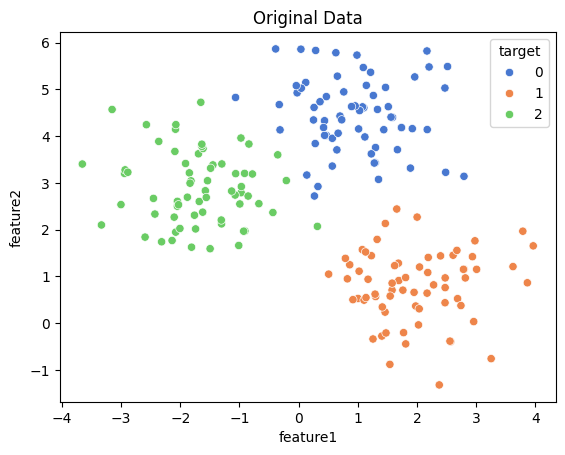

In [134]:
# 데이터 시각화
sns.scatterplot(data=cluster_df, x='feature1', y='feature2', 
                hue='target', palette='muted');
plt.title('Original Data');

### 군집화

In [135]:
# 클러스터링 객체 생성
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=0) # KMeans 기법의 클러스터링 객체 생성

# 학습 및 클러스터링 결과 예측

#km.fit(features) # 모델 학습
#km.predict(features) # 모델로 예측

kmeans_cluster = km.fit_predict(features) #학습 + 예측 올인원

In [136]:
# 데이터프레임에 군집과 결과인 kmeans_cluster 컬럼 추가
cluster_df['kmeans_cluster'] = km.fit_predict(features) #학습 + 예측 올인원을 cluster_df의 컬럼으로 추가
cluster_df.head()

,feature1,feature2,target,kmeans_cluster
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,2
2,1.100228,4.606317,0,2
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,2


In [137]:
# 클러스터의 중심
km.cluster_centers_ #클러스트의 중심

array([[ 1.95763312,  0.81041752],
       [-1.70636483,  2.92759224],
       [ 0.990103  ,  4.44666506]])

In [138]:
print(cluster_df.columns)

Index(['feature1', 'feature2', 'target', 'kmeans_cluster'], dtype='object')


<Axes: title={'center': 'Original Data'}, xlabel='feature1', ylabel='feature2'>

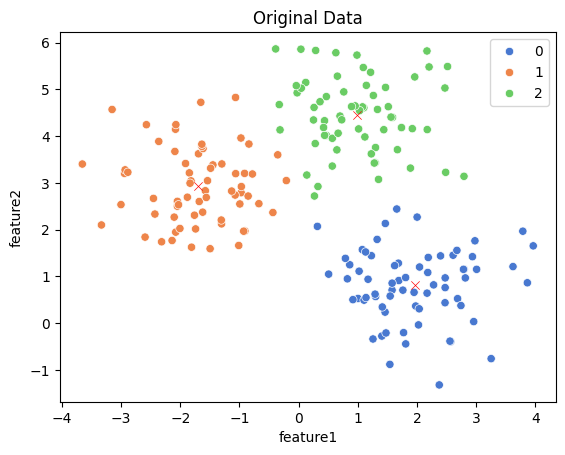

In [139]:
# 군집화 결과 시각화
# 데이터 시각화
sns.scatterplot(data=cluster_df, x='feature1', y='feature2',
                hue='kmeans_cluster', palette='muted')  # 클러스터 결과를 색상으로 구분하여 시각화
plt.title('Original Data')  # 그래프 제목 설정

# 개별 군집의 중심 좌표
sns.scatterplot(x=km.cluster_centers_[:,0],
                y=km.cluster_centers_[:,1],
                color='r',  # 중심 좌표를 빨간색으로 표시
                marker = 'x')  # 중심 좌표를 x 마커로 표시

 

### elbow 방법

In [140]:
# inertia_: 각 데이터 포인트와 그 데이터가 속한 군집의 중심점 사이의 거리 제곱합 

inertia = []  # 빈 리스트를 생성

for i in range(2, 7):
    km = KMeans(i)  # KMeans 객체를 생성, i는 클러스터 수
    km.fit(features)  # 모델을 데이터에 맞춤
    print(km.inertia_)  # 각 클러스터 수에 대한 값을 출력
    inertia.append(km.inertia_)  # 리스트에 추가

print(inertia)  # 값을 출력

548.0904569461313
240.0078759459446
211.02676054127298
180.02061679445822
151.79321225967868
[548.0904569461313, 240.0078759459446, 211.02676054127298, 180.02061679445822, 151.79321225967868]


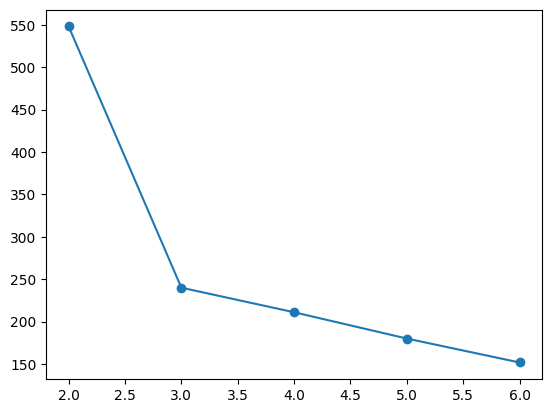

In [141]:
# inertia 시각화
plt.plot(range(2,7), inertia, marker='o')

### 실루엣 분석

In [142]:
# 개별 실루엣 계수 (군집 평가 지표)
from sklearn.metrics import silhouette_samples  # 실루엣 점수 계산 함수

# 실루엣 점수를 계산하여 'silhouette' 컬럼에 추가
cluster_df['silhouette'] = silhouette_samples(features, kmeans_cluster)

cluster_df.head()   # 데이터 프레임의 처음 몇 행을 출력

,feature1,feature2,target,kmeans_cluster,silhouette
0,-1.692427,3.622025,2,1,0.598109
1,0.697940,4.428867,0,2,0.658958
2,1.100228,4.606317,0,2,0.704928
3,-1.448724,3.384245,2,1,0.609202
4,1.214861,5.364896,0,2,0.658057


In [150]:
# 다른 군집에 클러스터가 할당된 데이터가 있는지 확인
cluster_df.loc[cluster_df['silhouette']<0] # 실루엣 점수가 0보다 작은 행들을 필터링하여 선택

,feature1,feature2,target,kmeans_cluster,silhouette


In [151]:
# 평균 실루엣 계수
from sklearn.metrics import silhouette_score  # 실루엣 점수 계산 함수

silhouette_score(features, kmeans_cluster) # 실루엣 점수를 계산

np.float64(0.5764726251866076)

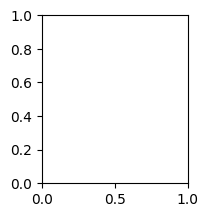

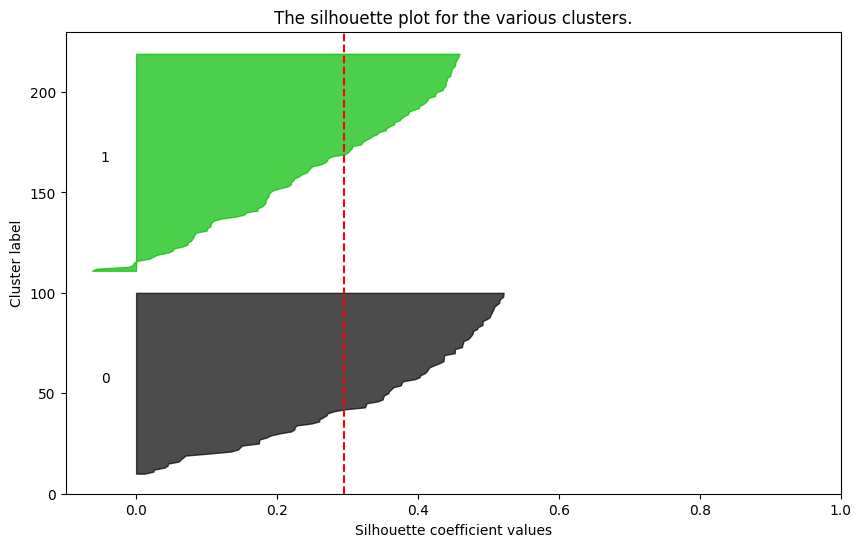

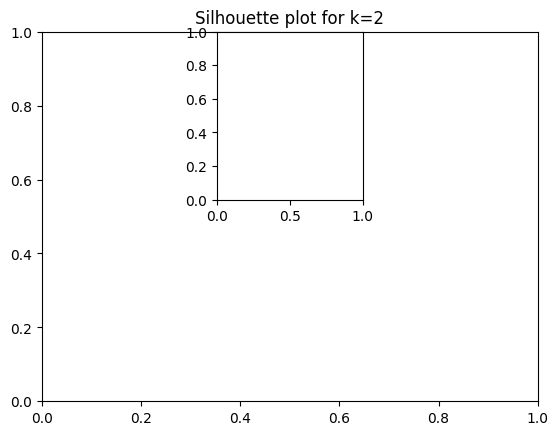

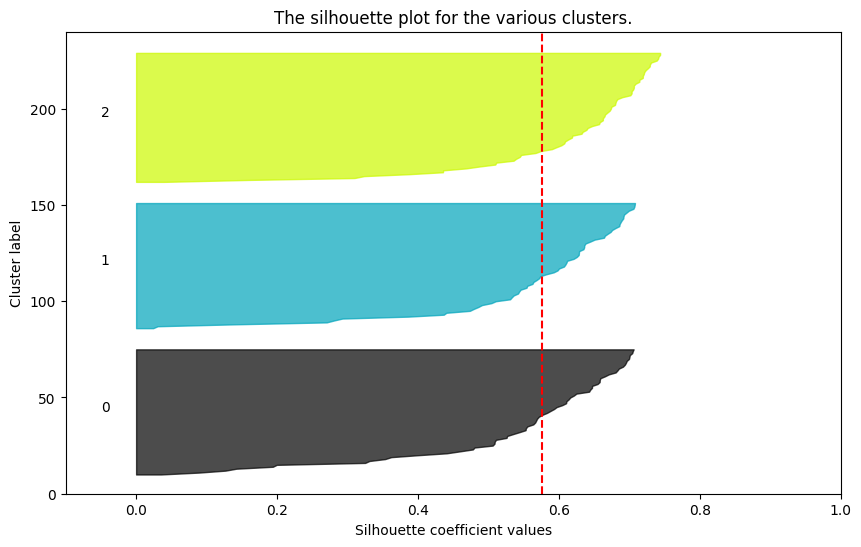

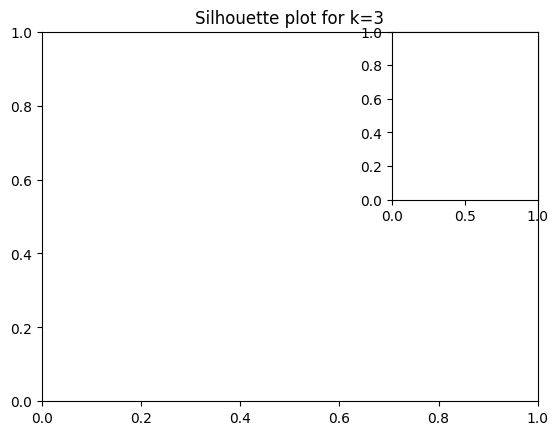

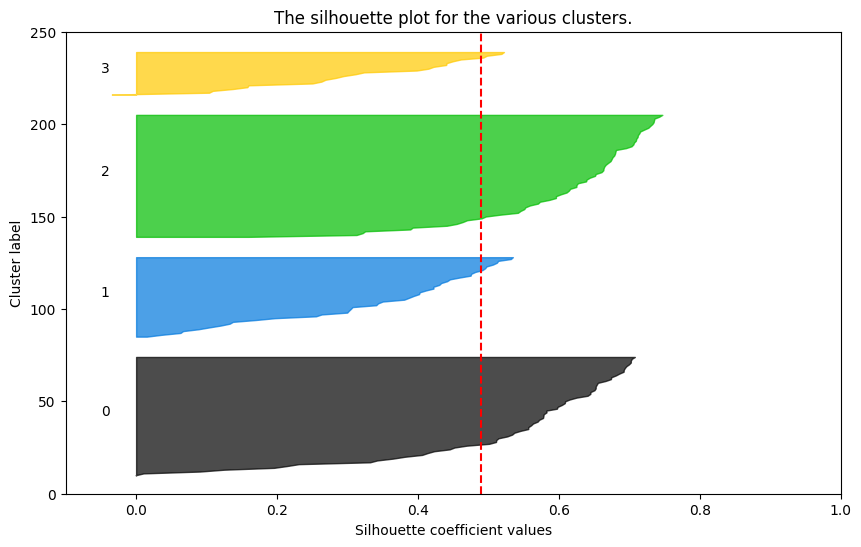

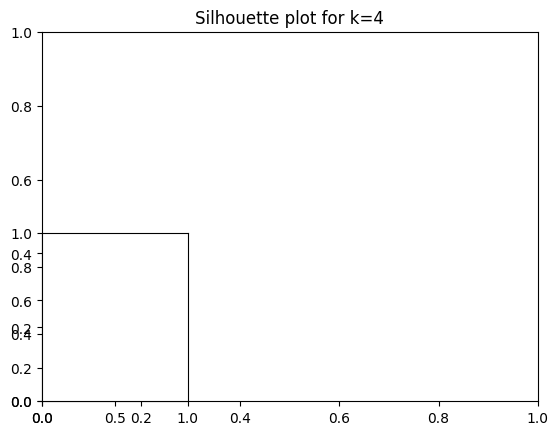

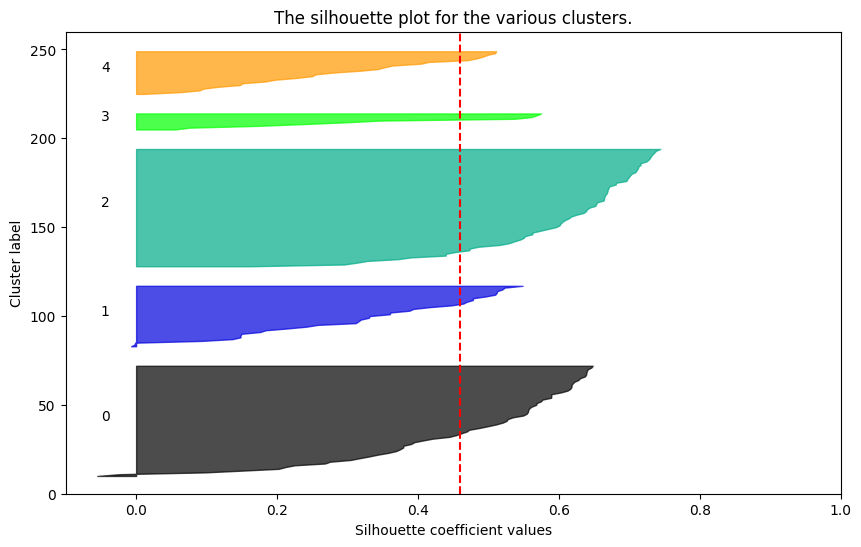

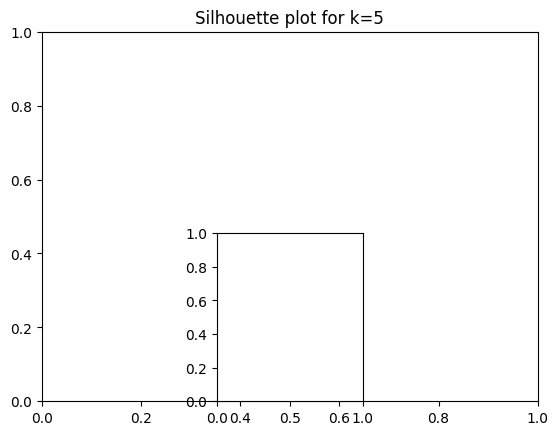

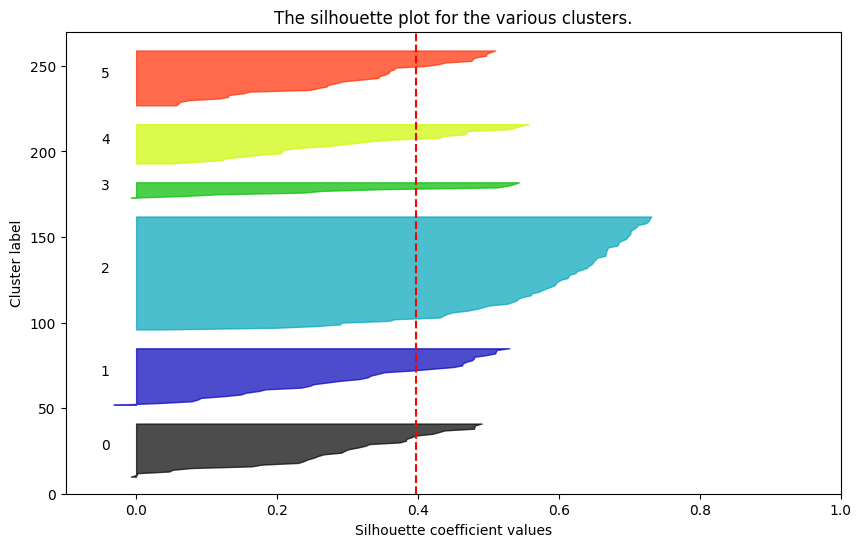

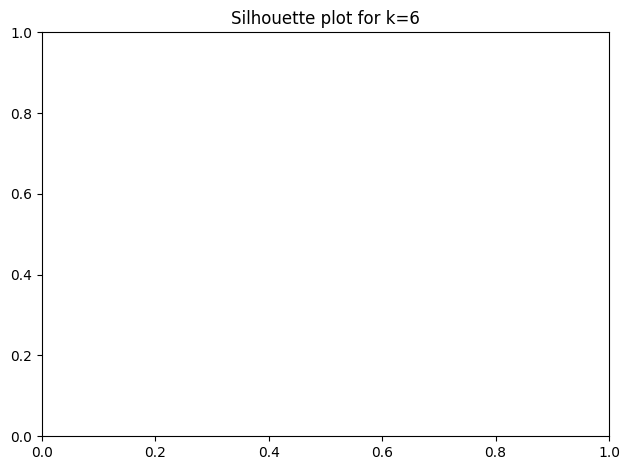

In [156]:
# 최적의 실루엣 찾기
from silhouette_analysis import silhouette_plot as s  # 실루엣 플롯을 위한 함수

i = 1  # 서브플롯 인덱스 초기화

for k in range(2, 7):
    plt.subplot(2, 3, i)  # 서브플롯 생성
    i += 1  # i값 증가
    s(features, k)  # 실루엣 플롯 생성
    plt.title(f'Silhouette plot for k={k}')  # 각 서브플롯에 제목을 추가
    
plt.tight_layout()  # 서브플롯 간의 레이아웃을 조정
plt.show()  # 그래프를 화면에 표시

# DBSCAN

### 데이터 준비

In [157]:
from sklearn.datasets import make_circles  # 원형 데이터셋 생성을 위한 모듈 임포트

X, y = make_circles(n_samples=1000,        # 샘플 1000개 생성
                    shuffle=True,          # 데이터 섞기
                    noise=0.05,            # 노이즈 추가
                    random_state=0,        # 랜덤 시드 고정
                    factor=0.5)            # 원 안쪽과 바깥쪽 반지름 비율

df = pd.DataFrame(X, columns=['feature1', 'feature2'])  # 데이터프레임 생성 (특징)
df['target'] = y  # 타겟 변수 추가

df.head()  # 데이터프레임의 처음 몇 행 출력

,feature1,feature2,target
0,0.519781,-0.015981,1
1,-0.057719,-0.420279,1
2,-0.805155,-0.662227,0
3,0.316549,0.312730,1
4,-0.304804,0.407563,1


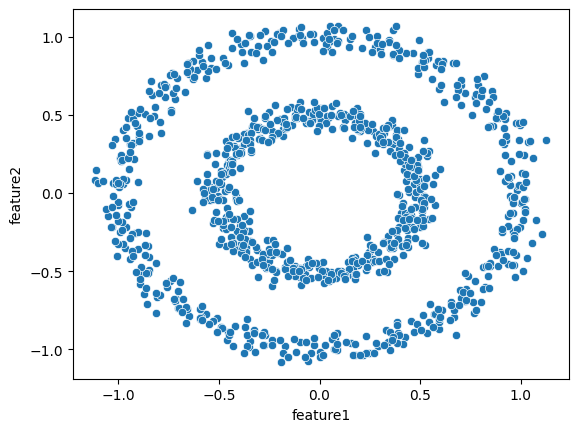

In [158]:
sns.scatterplot(data=df, x='feature1', y='feature2');

### k-means clustering

In [159]:
from sklearn.cluster import KMeans

# 클래스로 객체 생성
km = KMeans(n_clusters=2, random_state=0)

# 클러스터링
df['kmeans'] = km.fit_predict(X)
df.head()

,feature1,feature2,target,kmeans
0,0.519781,-0.015981,1,0
1,-0.057719,-0.420279,1,0
2,-0.805155,-0.662227,0,1
3,0.316549,0.312730,1,0
4,-0.304804,0.407563,1,1


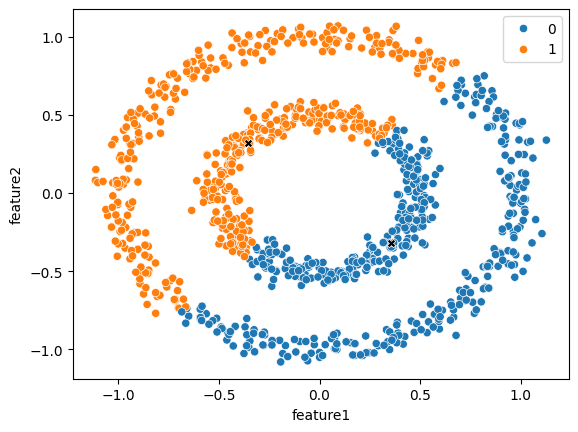

In [160]:
sns.scatterplot(data=df, x='feature1', y='feature2', hue='kmeans')  # 데이터프레임 df의 'feature1'과 'feature2'를 사용하여 kmeans 클러스터별로 색을 다르게 한 산점도 그림
sns.scatterplot(x=km.cluster_centers_[:,0], 
                y=km.cluster_centers_[:,1],
                marker='X', color='k')  # 클러스터 중심을 X 마커와 검은색으로 표시

### DBSCAN

In [162]:
from sklearn.cluster import DBSCAN  # DBSCAN 클러스터링 알고리즘

# DBSCAN 객체를 생성 (eps=0.2, min_samples=10으로 설정)
dbscan = DBSCAN(eps=0.2, min_samples=10)

# DBSCAN을 사용하여 데이터 클러스터링, 결과를 'dbscan' 컬럼에 추가
df['dbscan'] = dbscan.fit_predict(X)

df.head()

,feature1,feature2,target,kmeans,dbscan
0,0.519781,-0.015981,1,0,0
1,-0.057719,-0.420279,1,0,0
2,-0.805155,-0.662227,0,1,1
3,0.316549,0.312730,1,0,0
4,-0.304804,0.407563,1,1,0


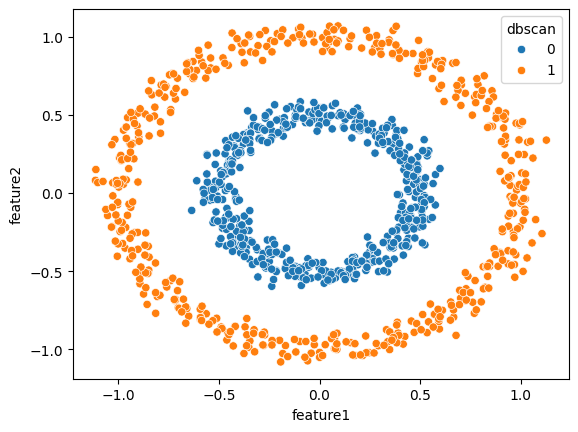

In [163]:
# 시각화
sns.scatterplot(data=df, x='feature1', y='feature2', hue='dbscan'); 